In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Zad 1

Zakładamy, że mamy neuron o 2 wejściach z wagami równymi [0.2, 0.3]. Przekazujemy do
neuronu sygnały wejściowe: [1, -6], [-3, 2], [0.3, -1], [2.1, -1.4], [-9,2]. Wyliczyć ważoną sumę
wejść oraz sygnał wyjściowy neuronu liniowego, gdy
a) Brak wartości progowej
b) Wartość progowa (waga) wynosi 1.2.

In [2]:
weights = [0.2, 0.3]
input_pair_signals = [[1, -6], [-3, 2], [0.3, -1], [2.1, -1.4], [-9,2]]
threshold_values = [0, 1.2]

a) i b)

In [3]:
x_signals_arr = []
y_signals_arr = []
thresholds_arr = []
nets_arr = []
for threshold in threshold_values:
    for inp_pair_sig in input_pair_signals:
        net = 1 * threshold
        x1_value = inp_pair_sig[0] * weights[0]
        x2_value = inp_pair_sig[1] * weights[1]
        net += x1_value
        net += x2_value
        # adding to arrays
        x_signals_arr.append(inp_pair_sig[0])
        y_signals_arr.append(inp_pair_sig[1])
        thresholds_arr.append(threshold)
        nets_arr.append(round(net, 2))

In [4]:
table = pd.DataFrame()
table["signal_x"] = x_signals_arr
table["signal_y"] = y_signals_arr
table["threshold"] = thresholds_arr
table["net"] = nets_arr
table

,signal_x,signal_y,threshold,net
0,1.0,-6.0,0.0,-1.60
1,-3.0,2.0,0.0,-0.00
2,0.3,-1.0,0.0,-0.24
3,2.1,-1.4,0.0,0.00
4,-9.0,2.0,0.0,-1.20
5,1.0,-6.0,1.2,-0.40
6,-3.0,2.0,1.2,1.20
7,0.3,-1.0,1.2,0.96
8,2.1,-1.4,1.2,1.20
9,-9.0,2.0,1.2,-0.00


# Zad 2

Wyznaczyć wartości sygnału wyjściowego neuronu zdefiniowanego w pkt 1. (pkt a i b) dla
funkcji aktywacji:
a) Unipolarnej dyskretnej
b) Bipolarnej dyskretnej
c) Unipolarnej ciągłej (sigmoidalnej)
d) Bipolarnej ciągłej (sigmoidalnej)

In [5]:
def uni_dysc(net):
    return 1 if net >= 0 else 0
def uni_cont(net, lbd):
    return 1  / 1 + np.exp(-1 * lbd * net)
def bip_dysc(net):
    return 1 if net >= 0 else -1
def bip_cont(net, lbd):
    return (2  / 1 + np.exp(-1 * lbd * net)) - 1

In [6]:
uni_dysc_arr = []
uni_cont_arr = []
bip_dysc_arr = []
bip_cont_arr = []
for net in nets_arr:
    uni_dysc_arr.append(uni_dysc(net))
    uni_cont_arr.append(uni_cont(net, 1))
    bip_dysc_arr.append(bip_dysc(net))
    bip_cont_arr.append(bip_cont(net, 1))

In [7]:
table["uni_dysc"] = uni_dysc_arr
table["uni_cont"] = uni_cont_arr
table["bip_dysc"] = bip_dysc_arr
table["bip_cont"] = bip_cont_arr
table

,signal_x,signal_y,threshold,net,uni_dysc,uni_cont,bip_dysc,bip_cont
0,1.0,-6.0,0.0,-1.60,0,5.953032,-1,5.953032
1,-3.0,2.0,0.0,-0.00,1,2.000000,1,2.000000
2,0.3,-1.0,0.0,-0.24,0,2.271249,-1,2.271249
3,2.1,-1.4,0.0,0.00,1,2.000000,1,2.000000
4,-9.0,2.0,0.0,-1.20,0,4.320117,-1,4.320117
5,1.0,-6.0,1.2,-0.40,0,2.491825,-1,2.491825
6,-3.0,2.0,1.2,1.20,1,1.301194,1,1.301194
7,0.3,-1.0,1.2,0.96,1,1.382893,1,1.382893
8,2.1,-1.4,1.2,1.20,1,1.301194,1,1.301194
9,-9.0,2.0,1.2,-0.00,1,2.000000,1,2.000000


# Zad 3

Dla neuronu z progiem oraz bez progu narysować wykresy przedstawiające reprezentację
wag (funkcja liniowa) oraz położenie sygnałów wejściowych.

In [8]:
def linear_function(x, weights, threshold=0):
    return (-weights[0] * x - threshold) / weights[1]

In [9]:
x_values = np.linspace(-10, 10, 100)

y_no_threshold = linear_function(x_values, weights, threshold_values[0])
y_with_threshold = linear_function(x_values, weights, threshold_values[1])

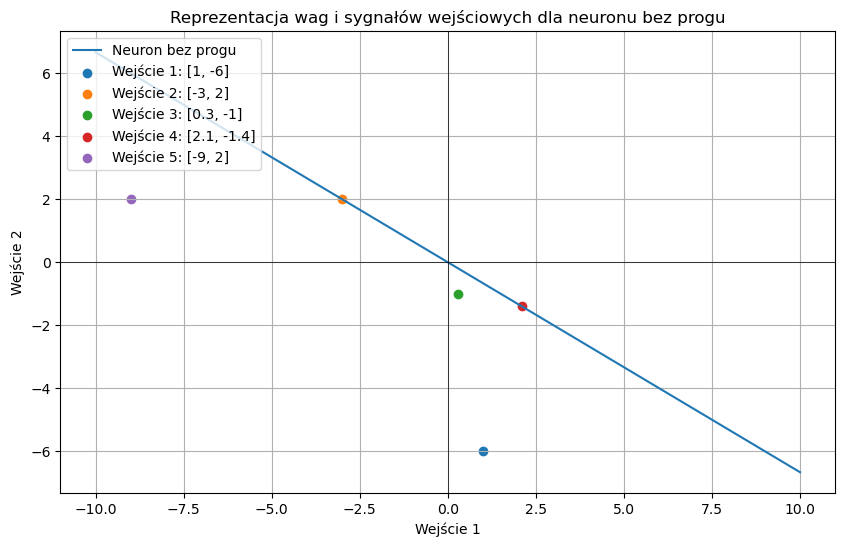

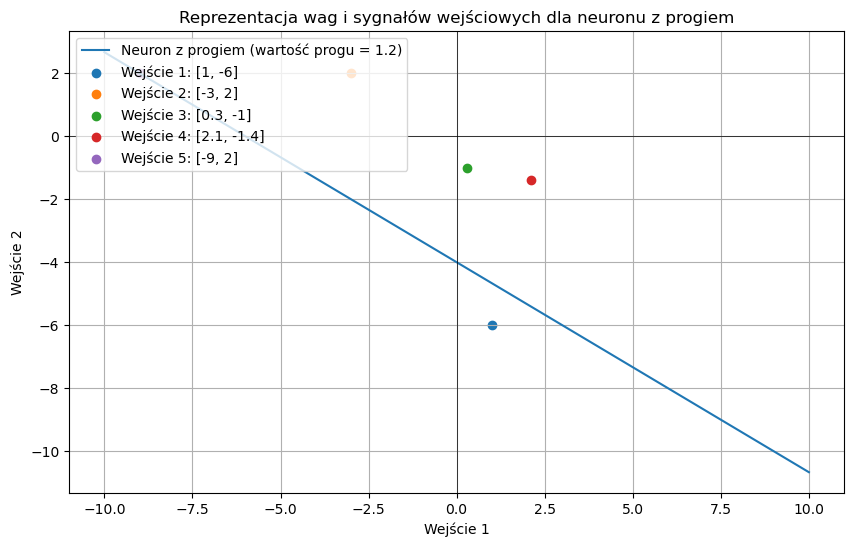

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_no_threshold, label="Neuron bez progu", linestyle="-")
for i, input_signal in enumerate(input_pair_signals):
    plt.scatter(input_signal[0], input_signal[1], label=f"Wejście {i+1}: {input_signal}")
plt.xlabel("Wejście 1")
plt.ylabel("Wejście 2")
plt.title("Reprezentacja wag i sygnałów wejściowych dla neuronu bez progu")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_with_threshold, label=f"Neuron z progiem (wartość progu = {threshold})", linestyle="-")
for i, input_signal in enumerate(input_pair_signals):
    plt.scatter(input_signal[0], input_signal[1], label=f"Wejście {i+1}: {input_signal}")
plt.xlabel("Wejście 1")
plt.ylabel("Wejście 2")
plt.title("Reprezentacja wag i sygnałów wejściowych dla neuronu z progiem")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

# Zad 4

Podać po trzy przykłady danych wejściowych, które będą aktywowały neuron i nie będą go
aktywowały.

In [11]:
def check_activation(inputs, weights, threshold=0):
    weighted_sum = np.dot(inputs, weights)
    activation = weighted_sum >= -threshold
    return activation

test_inputs_no_threshold = np.array([
    [2, -4],
    [-2, 4],
    [1, -3],
    [5, -10],
    [-5, 10],
    [0, 0]
])

test_inputs_with_threshold = np.array([
    [3, -6],
    [2, 5],
    [-1, 9],
    [-3, -2],
    [-1, -4],
    [-3, -6]
])

activations_no_threshold = check_activation(test_inputs_no_threshold, weights, threshold_values[0])

activations_with_threshold = check_activation(test_inputs_with_threshold, weights, threshold_values[1])

activated_no_threshold = test_inputs_no_threshold[activations_no_threshold][:3]
non_activated_no_threshold = test_inputs_no_threshold[~activations_no_threshold][:3]

activated_with_threshold = test_inputs_with_threshold[activations_with_threshold][:3]
non_activated_with_threshold = test_inputs_with_threshold[~activations_with_threshold][:3]

print("Przykłady aktywujące neuron bez progu:")
print(activated_no_threshold)

print("\nPrzykłady nieaktywujące neuron bez progu:")
print(non_activated_no_threshold)

print("\nPrzykłady aktywujące neuron z progiem:")
print(activated_with_threshold)

print("\nPrzykłady nieaktywujące neuron z progiem:")
print(non_activated_with_threshold)

Przykłady aktywujące neuron bez progu:
[[-2  4]
 [-5 10]
 [ 0  0]]

Przykłady nieaktywujące neuron bez progu:
[[  2  -4]
 [  1  -3]
 [  5 -10]]

Przykłady aktywujące neuron z progiem:
[[ 3 -6]
 [ 2  5]
 [-1  9]]

Przykłady nieaktywujące neuron z progiem:
[[-3 -2]
 [-1 -4]
 [-3 -6]]
